<a href="https://colab.research.google.com/github/farrukh61/CCPP-Power-Output-Prediction/blob/main/NN_MLPRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/drive')
df = pd.read_csv('/drive/MyDrive/ml project/ccpp_data.csv')

Mounted at /drive


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.4f}'.format
from sklearn.metrics import mean_absolute_error,mean_squared_error 
from sklearn.metrics import mean_absolute_percentage_error 

In [ ]:
df = pd.read_csv('/drive/MyDrive/ml project/ccpp_data.csv')
df.head()

,AT,V,AP,RH,PE
0,14.9600,41.7600,1024.0700,73.1700,463.2600
1,25.1800,62.9600,1020.0400,59.0800,444.3700
2,5.1100,39.4000,1012.1600,92.1400,488.5600
3,20.8600,57.3200,1010.2400,76.6400,446.4800
4,10.8200,37.5000,1009.2300,96.6200,473.9000


In [ ]:
x = df.drop('PE',axis=1)
y = df.PE
x_train,x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,random_state=324)

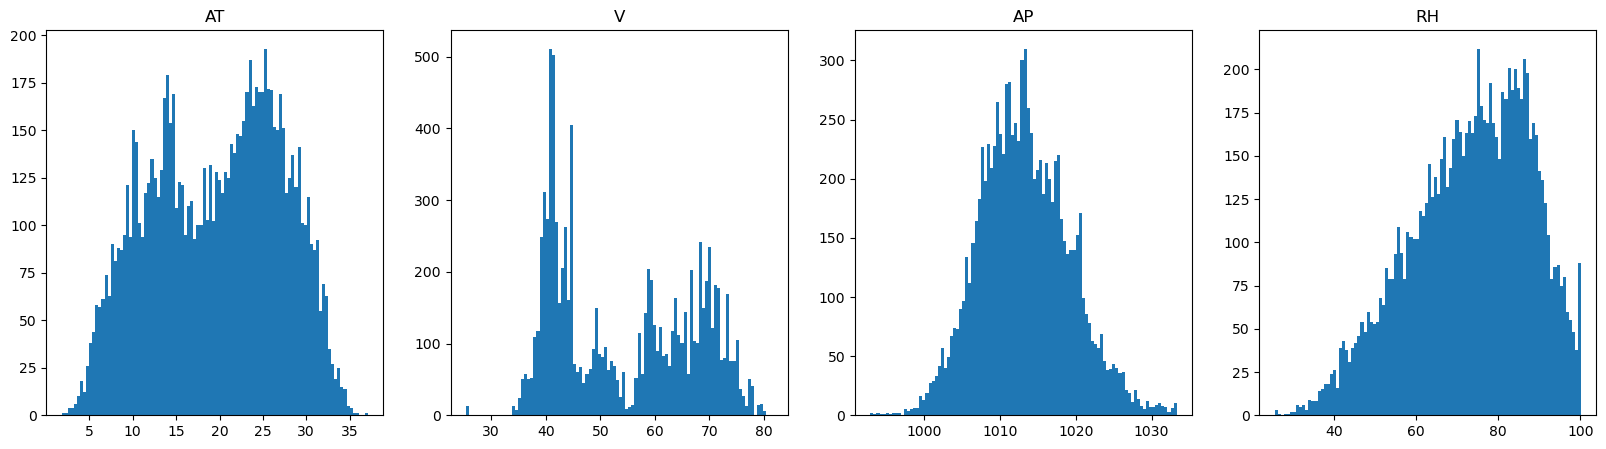

In [ ]:
# visualizing the distribution of data
fig, axs = plt.subplots(nrows=1, ncols=len(x.columns), figsize=(20,5))

for i,column in enumerate(x.columns):
    axs[i].hist(x[column],bins=100)
    axs[i].set_title(column)
    
plt.show()

In [ ]:
# scaling. 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
m_scaler=MinMaxScaler()
s_scaler = StandardScaler()
m_scaler.fit(x_train)
s_scaler.fit(x_train)


StandardScaler()

In [ ]:
#minmax scaled
x_train_m = m_scaler.transform(x_train)
x_test_m = m_scaler.transform(x_test)
# standard scaled
xs_train = s_scaler.transform(x_train)
xs_test = s_scaler.transform(x_test)

In [ ]:
pd.concat([pd.DataFrame(x_train_m).describe(),pd.DataFrame(x_train_s).describe()],axis=0,keys = ['MinMax scaled','Standard Scaled'])

0         1         2         3
MinMax scaled   count 7654.0000 7654.0000 7654.0000 7654.0000
                mean     0.5050    0.5141    0.5037    0.6398
                std      0.2120    0.2265    0.1470    0.1959
                min      0.0000    0.0000    0.0000    0.0000
                25%      0.3309    0.2900    0.4004    0.5067
                50%      0.5238    0.4731    0.4957    0.6633
                75%      0.6785    0.7327    0.6020    0.7935
                max      1.0000    1.0000    1.0000    1.0000
Standard Scaled count 7654.0000 7654.0000 7654.0000 7654.0000
                mean     0.0000    0.0000    0.0000    0.0000
                std      1.0001    1.0001    1.0001    1.0001
                min     -2.3827   -2.2700   -3.4263   -3.2664
                25%     -0.8215   -0.9893   -0.7025   -0.6796
                50%      0.0887   -0.1808   -0.0544    0.1200
                75%      0.8184    0.9655    0.6691    0.7850
                max      2.3354    2.1457    3.3764    1.8390

In [ ]:
pd.concat([pd.DataFrame(x_test_m).describe(),pd.DataFrame(x_test_s).describe()],axis=0,keys = ['MinMax scaled','Standard Scaled'])

0         1         2         3
MinMax scaled   count 1914.0000 1914.0000 1914.0000 1914.0000
                mean     0.5071    0.5189    0.5056    0.6416
                std      0.2077    0.2247    0.1468    0.1952
                min      0.0595    0.0000    0.0054    0.0099
                25%      0.3346    0.2966    0.4032    0.5025
                50%      0.5313    0.4890    0.4983    0.6569
                75%      0.6722    0.7322    0.6072    0.8000
                max      0.9431    0.9754    0.9936    1.0001
Standard Scaled count 1914.0000 1914.0000 1914.0000 1914.0000
                mean     0.0097    0.0214    0.0134    0.0093
                std      0.9802    0.9921    0.9987    0.9967
                min     -2.1020   -2.2700   -3.3893   -3.2158
                25%     -0.8042   -0.9602   -0.6836   -0.7007
                50%      0.1241   -0.1109   -0.0367    0.0871
                75%      0.7890    0.9632    0.7044    0.8178
                max      2.0668    2.0372    3.3327    1.8397

In [ ]:
# model
from sklearn.neural_network import MLPRegressor
nn = MLPRegressor(hidden_layer_sizes = (11,11,11,), # it represents the number of neurons per hidden layer, here only one value 
                                              # is give so we have 3 layers (1 hidden, 2 input,output)
                 activation = 'logistic',
                 warm_start = True,
                 max_iter = 4000,
                 random_state = 2345,
                 early_stopping = False,
                 )

In [ ]:
# model
from sklearn.neural_network import MLPRegressor

n_neurons = np.arange(3,30)
MAPE = []
MAE = []
RMSE = []



for n in n_neurons:
    

    nn = MLPRegressor(hidden_layer_sizes = (n,n,n,), # it represents the number of neurons per hidden layer, here only one value 
                                              # is give so we have 3 layers (1 hidden, 2 input,output)
                 activation = 'logistic',
                 warm_start = True,
                 max_iter = 1000,
                 random_state = 2345,
                 early_stopping = False,
                 )
    LL_dt = nn.fit(xs_train,y_train)
    ytrain_pred = LL_dt.predict(xs_train)
    mean_abs_per_err = mean_absolute_percentage_error(y_train,ytrain_pred)
    mean_abs_err = mean_absolute_error(y_train,ytrain_pred)
    rmse = np.sqrt(mean_squared_error(y_train,ytrain_pred))
    MAPE.append(mean_abs_per_err)
    MAE.append(mean_abs_err)
    RMSE.append(rmse)

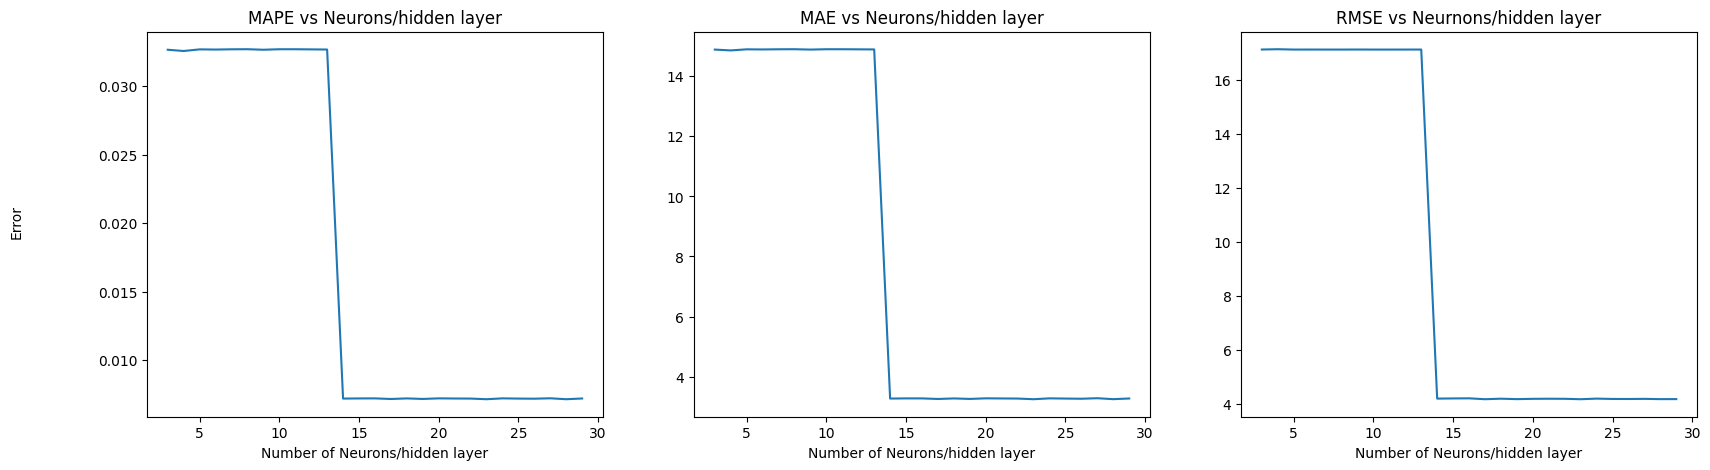

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))
# Add a common y-axis label
fig.text(0.06, 0.5, 'Error', ha='center', va='center', rotation='vertical')

# Plot MAPE values
ax1.plot(n_neurons, MAPE)
ax1.set_xlabel('Number of Neurons/hidden layer')

ax1.set_title('MAPE vs Neurons/hidden layer')

# Plot MAE values
ax2.plot(n_neurons, MAE)
ax2.set_xlabel('Number of Neurons/hidden layer')

ax2.set_title('MAE vs Neurons/hidden layer')

# Plot RMSE values
ax3.plot(n_neurons, RMSE)
ax3.set_xlabel('Number of Neurons/hidden layer')

ax3.set_title('RMSE vs Neurnons/hidden layer')

# Display the plot
plt.show()

27
3.280056180629648


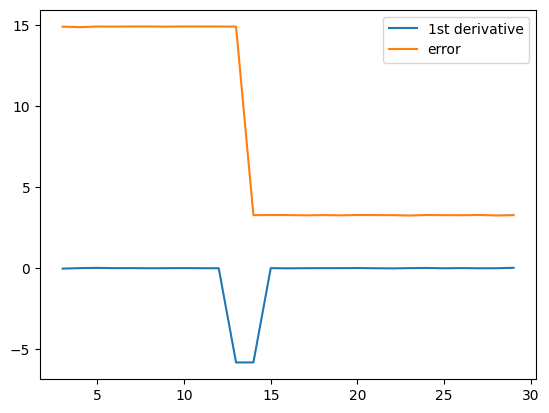

In [ ]:
#Optimum values
# number of neurons after which no change in error occurs
dMAE = np.gradient(MAE)  # rate of change of MAE w.r.t index
# d2MAE = np.gradient(dMAE)

# threshold for gradient

threshold  =0.1

plateau_idx=np.argmax(np.where(np.abs(dMAE)<threshold))

plateau_neurons = n_neurons[plateau_idx]
print(plateau_neurons)
print(MAE[plateau_idx])
plt.plot(n_neurons,dMAE,label='1st derivative')
# plt.plot(n_neurons,d2MAE,label='2nd derivative')
plt.plot(n_neurons,MAE,label='error')
plt.legend()
plt.show()

In [ ]:
nn_best = MLPRegressor(hidden_layer_sizes = (17,17,17,), # it represents the number of neurons per hidden layer, here only one value 
                                              # is give so we have 3 layers (1 hidden, 2 input,output)
                 activation = 'logistic',
                 warm_start = True,
                 max_iter = 1000,
                 random_state = 2345,
                 early_stopping = True,
                 )
nn_best.fit(xs_train,y_train)

MLPRegressor(activation='logistic', early_stopping=True,
             hidden_layer_sizes=(17, 17, 17), max_iter=1000, random_state=2345,
             warm_start=True)

In [ ]:
from sklearn.metrics import mean_absolute_error ,mean_squared_error 
from sklearn.metrics import mean_absolute_percentage_error
import seaborn as sns

In [ ]:
def evaluate(model,train_features, train_labels, test_features, test_labels):  #feature -> x and label -> y
    
    
    pred_labels_train = model.predict(train_features)
    mean_abs_per_err_train = mean_absolute_percentage_error(train_labels,pred_labels_train)
    mean_abs_err_train = mean_absolute_error(train_labels,pred_labels_train)
    rmse_train = np.sqrt(mean_squared_error (train_labels,pred_labels_train))

    pred_labels_test = model.predict(test_features)
    mean_abs_per_err_test = mean_absolute_percentage_error(test_labels,pred_labels_test)
    mean_abs_err_test = mean_absolute_error(test_labels,pred_labels_test)
    rmse_test = np.sqrt(mean_squared_error (test_labels,pred_labels_test))

    plt.show()
    fig, ax = plt.subplots(figsize=(10, 5))

    # Train error bars
    train_error_values = [mean_abs_per_err_train, mean_abs_err_train, rmse_train]
    train_metrics = ["MAPE", "MAE", "RMSE"]
    train_pos = np.arange(len(train_metrics))
    ax.bar(train_pos - 0.2, train_error_values, width=0.4, label="Train Errors")
    
    # Add value labels to train error bars
    for i, value in enumerate(train_error_values):
        ax.text(train_pos[i]-0.2, value, f"{value:.3f}", ha="center", va="bottom")
    
    # Test error bars
    test_error_values = [mean_abs_per_err_test, mean_abs_err_test, rmse_test]
    test_metrics = ["MAPE", "MAE", "RMSE"]
    test_pos = np.arange(len(train_metrics))
    ax.bar(test_pos + 0.2, test_error_values, width=0.4, label="Test Errors")
    
    # Add value labels to test error bars
    for i, value in enumerate(test_error_values):
        ax.text(test_pos[i]+0.2, value, f"{value:.3f}", ha="center", va="bottom")
    
    # Set axis labels and legend
    ax.set_xticks(range(len(train_metrics)))
    ax.set_xticklabels(train_metrics)
    ax.set_title("Train and Test Errors")
    ax.set_ylabel("Error Value")
    ax.legend()
    
    plt.show()

    plt.plot(nn_best.loss_curve_)
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.show()
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,5))
    
    sns.distplot(train_labels, hist=False, color="r", label="Ground Truth",ax=ax1)
    sns.distplot(pred_labels_train, hist=False, color="b", label="Predicted Values" , ax=ax1)
    ax1.set_title('Train Data')
    ax1.legend()
    sns.distplot(test_labels, hist=False, color="r", label="Ground Truth", ax=ax2)
    sns.distplot(pred_labels_test, hist=False, color="b", label="Predicted Values" , ax=ax2)
    ax2.set_title('Test Data')
    ax2.legend()

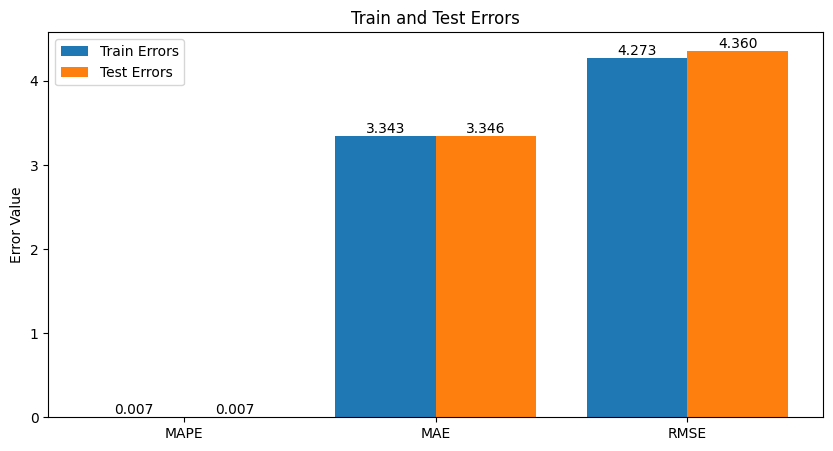

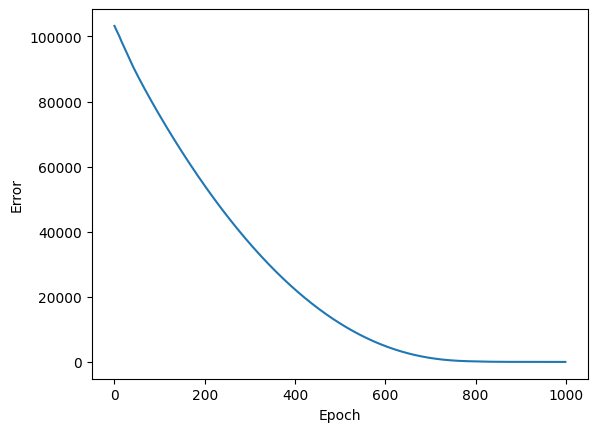

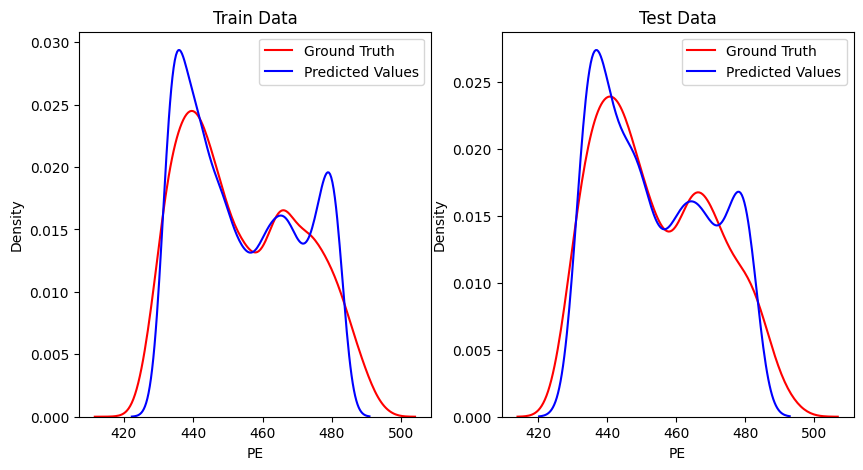

In [ ]:
evaluate(nn_best,xs_train,y_train,xs_test,y_test)

In [ ]:
from sklearn import metrics
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


# error on train data 
# on minmax scaling
mae = metrics.mean_absolute_error(y_train,nn.predict(x_train_m))
rmse = np.sqrt(metrics.mean_squared_error(y_train,nn.predict(x_train_m)))
mape = metrics.mean_absolute_percentage_error(y_train,nn.predict(x_train_m))

print('Mean absolute eror: ', mae)
print('Mean squared eror: ', rmse)
print('Mean absolute percentage eror: ', mape)

Mean absolute eror:  13.333716989487437
Mean squared eror:  17.200878589152566
Mean absolute percentage eror:  0.028580860884518902


In [ ]:
# error on test data 

mae = metrics.mean_absolute_error(y_test,nn.predict(x_test_m))
rmse = np.sqrt(metrics.mean_squared_error(y_test,nn.predict(x_test_m)))
mape = metrics.mean_absolute_percentage_error(y_test,nn.predict(x_test_m))

print('Mean absolute eror: ', mae)
print('Mean squared eror: ', rmse)
print('Mean absolute percentage eror: ', mape)

Mean absolute eror:  13.102520235150255
Mean squared eror:  16.959144615033367
Mean absolute percentage eror:  0.028097873316858615
